# Forecasting the sales of store using LSTM

### importing necessary libraries

In [1]:
import pandas as pd #Reading the dataset
import numpy as np #numerical calculations
import matplotlib.pyplot as plt #for data visualization
import statsmodels.api as sm #statistical data exploration

# Importing dataset
1.Since data is in form of excel file we have to use pandas read_excel to load the data
2.After loading it is important to check the complete information of data as it can indication many of the hidden infomation such as null values in a column or a row
3.Check whether any null values are there or not. if it is present then following can be done, a.Imputing data using Imputation method in sklearn b.Filling NaN values with mean, median and mode using fillna() method
4.Describe data --> which can give statistical analysis

In [2]:
data=pd.read_excel(r"C:\\Users\prash\Desktop\VEC Modified projects\SElF\Forecasting the sales of store\Forecasting the sales of store\dataset\Sales_Forecasting.xlsx")

In [3]:
#head() method is used to return top n (5 by default) rows of a DataFrame or series.
data.head()

,HQ,Country,State_of_outlet,City_of_outlet,Month,Day,Year,Total_Sales
0,Asia,India,NaN,Bombay (Mumbai),1,1,2005,72.2
1,Asia,India,NaN,Bombay (Mumbai),1,2,2005,72.7
2,Asia,India,NaN,Bombay (Mumbai),1,3,2005,74.3
3,Asia,India,NaN,Bombay (Mumbai),1,4,2005,78.9
4,Asia,India,NaN,Bombay (Mumbai),1,5,2005,81.5


In [4]:
#tail() method is used to return bottom n (5 by default) rows of a DataFrame or series.
data.tail()

,HQ,Country,State_of_outlet,City_of_outlet,Month,Day,Year,Total_Sales
17531,Asia,India,NaN,Delhi,12,27,2016,61.3
17532,Asia,India,NaN,Delhi,12,28,2016,61.7
17533,Asia,India,NaN,Delhi,12,29,2016,59.3
17534,Asia,India,NaN,Delhi,12,30,2016,57.1
17535,Asia,India,NaN,Delhi,12,31,2016,58.3


In [5]:
data.describe()

,State_of_outlet,Month,Day,Year,Total_Sales
count,0.0,17536.000000,17536.000000,17536.000000,17536.000000
mean,NaN,6.524179,15.732892,2010.502053,80.117963
std,NaN,3.449400,8.801978,3.452525,13.315486
min,NaN,1.000000,1.000000,2005.000000,-99.000000
25%,NaN,4.000000,8.000000,2008.000000,77.500000
50%,NaN,7.000000,16.000000,2011.000000,82.600000
75%,NaN,10.000000,23.000000,2014.000000,86.100000
max,NaN,12.000000,31.000000,2016.000000,102.500000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17536 entries, 0 to 17535
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   HQ               17536 non-null  object 
 1   Country          17536 non-null  object 
 2   State_of_outlet  0 non-null      float64
 3   City_of_outlet   17536 non-null  object 
 4   Month            17536 non-null  int64  
 5   Day              17536 non-null  int64  
 6   Year             17536 non-null  int64  
 7   Total_Sales      17536 non-null  float64
dtypes: float64(2), int64(3), object(3)
memory usage: 1.1+ MB


In [7]:
# converting month, day, year in right Date format
from datetime import datetime
data['Date'] = data.apply(lambda row: datetime.strptime(f"{int(row.Year)}-{int(row.Month)}-{int(row.Day)}", '%Y-%m-%d'), axis=1)

Let us take a look at how many years of date is present in the datset

In [8]:
data['Date'].min(), data['Date'].max()

(Timestamp('2005-01-01 00:00:00'), Timestamp('2016-12-31 00:00:00'))

## Data Preprocessing

### Dropping the columns

Let us remove the columns which are not necessary for analysis and sorting the sales values using date

In [9]:
cols = ['Month','Day','Year','City_of_outlet','State_of_outlet','Country','HQ']
data.drop(cols, axis=1, inplace=True)
data = data.sort_values('Date')

In [10]:
data.nunique()

Total_Sales     539
Date           4383
dtype: int64

### Checking or null values

Let us check for null values in the dataset 

In [11]:
data.isnull().any()

Total_Sales    False
Date           False
dtype: bool

We can see that there are no null values in the datset

In [12]:
data

,Total_Sales,Date
0,72.2,2005-01-01
730,75.8,2005-01-01
1095,61.0,2005-01-01
365,66.5,2005-01-01
1,72.7,2005-01-02
...,...,...
16802,67.4,2016-12-30
17169,76.8,2016-12-31
16437,79.7,2016-12-31
16803,67.1,2016-12-31


In [13]:
data.shape

(17536, 2)

In [14]:
# groupby the date value to get the sales sum of each order date
data = data.groupby('Date')['Total_Sales'].sum().reset_index()

In [15]:
data

,Date,Total_Sales
0,2005-01-01,275.5
1,2005-01-02,275.5
2,2005-01-03,278.6
3,2005-01-04,279.3
4,2005-01-05,281.4
...,...,...
4378,2016-12-27,288.4
4379,2016-12-28,283.3
4380,2016-12-29,281.7
4381,2016-12-30,282.0


Let us set the index for Date

In [16]:
Sales_y= data.set_index('Date')
Sales_y.index

DatetimeIndex(['2005-01-01', '2005-01-02', '2005-01-03', '2005-01-04',
               '2005-01-05', '2005-01-06', '2005-01-07', '2005-01-08',
               '2005-01-09', '2005-01-10',
               ...
               '2016-12-22', '2016-12-23', '2016-12-24', '2016-12-25',
               '2016-12-26', '2016-12-27', '2016-12-28', '2016-12-29',
               '2016-12-30', '2016-12-31'],
              dtype='datetime64[ns]', name='Date', length=4383, freq=None)

In [17]:
Sales_y

,Total_Sales
Date,
2005-01-01,275.5
2005-01-02,275.5
2005-01-03,278.6
2005-01-04,279.3
2005-01-05,281.4
...,...
2016-12-27,288.4
2016-12-28,283.3
2016-12-29,281.7


In [18]:
#Making a copy of the data before feature scaling
Sales=Sales_y.copy()

In [19]:
Sales_y.shape

(4383, 1)

In [20]:
import tensorflow as tf

In [21]:
tf.__version__

'2.5.0'

In [22]:
import keras

Using TensorFlow backend.


In [23]:
keras.__version__

'2.2.4'

### Selecting average daily sales for prediction
we will use the averages daily sales value for that month , and we are using the start of each month as the timestamp.

### Data Visualization

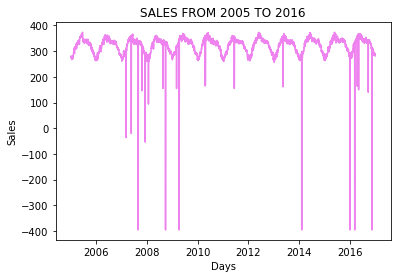

In [24]:

# Plotting Given Data
plt.plot(Sales_y, color = 'violet')
plt.title('SALES FROM 2005 TO 2016')
plt.xlabel('Days')
plt.ylabel('Sales')
plt.show()

In [25]:
#we will use the averages daily sales value for that month , and we are using the start of each month as the timestamp.
monthly_sales = Sales_y['Total_Sales'].resample('MS').mean()

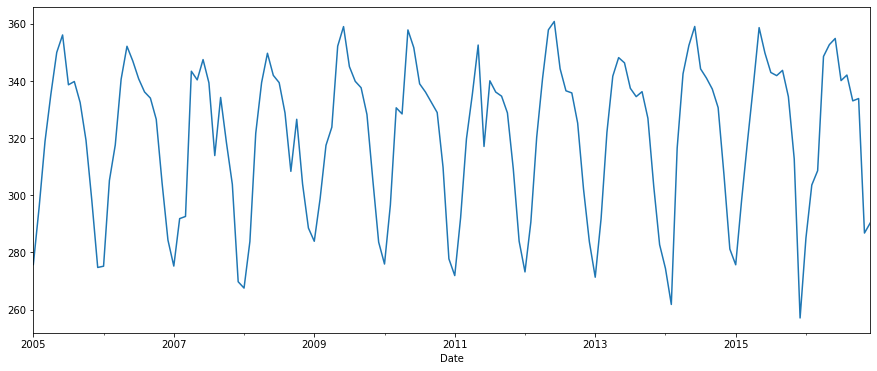

In [26]:
monthly_sales.plot(figsize=(15, 6))
plt.show()

We notice that the time-series has seasonality pattern, such as sales are always low at the beginning of the year and high at the end of the year. There is always an upward trend within any single year with a couple of low months in the mid of the year.

Time series analysis provides a body of techniques to better understand a dataset.
Perhaps the most useful of these is the decomposition of a time series into 4 constituent parts:

1.Level. The baseline value for the series if it were a straight line.
2.Trend. The optional and often linear increasing or decreasing behavior of the series over time.
3.Seasonality. The optional repeating patterns or cycles of behavior over time.
4.Noise. The optional variability in the observations that cannot be explained by the model.

Let us visualize our data using the above method that allows us to decompose our time series data

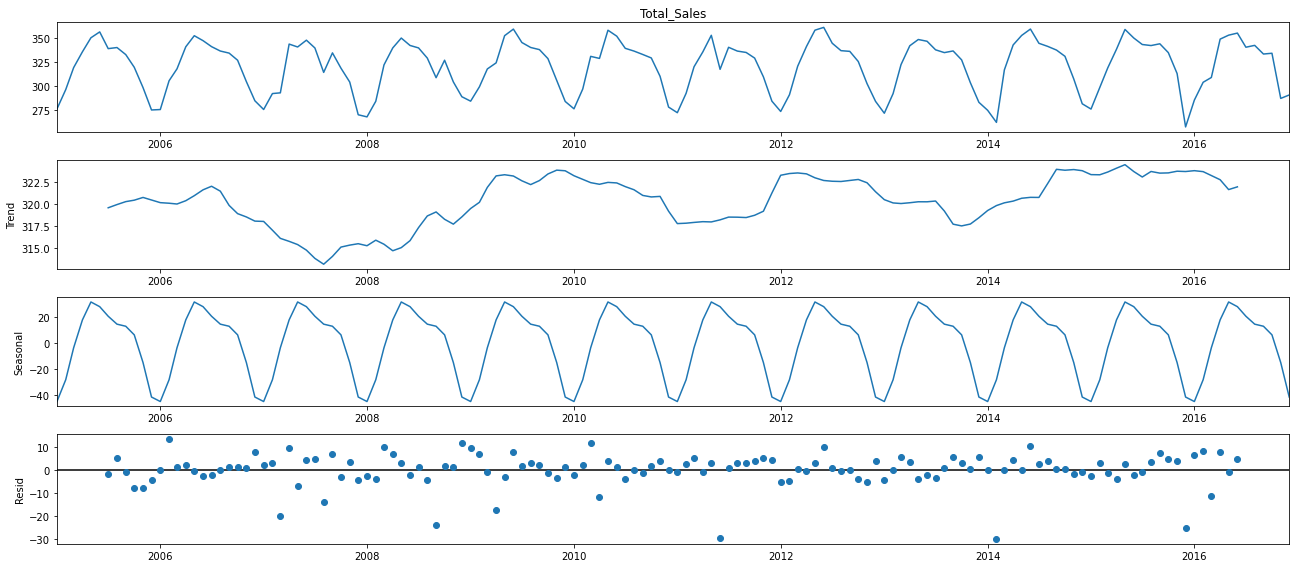

In [27]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(monthly_sales, model='additive')
fig = decomposition.plot()
plt.show()

From the above plot, we notice that the sales is following a seasonality

### Feature Scaling

In [28]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler

In [29]:
#Featuring Scaling
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
Sales_y=scaler.fit_transform(np.array(Sales_y).reshape(-1,1))

In [30]:
import pickle
pickle.dump(scaler,open("Scaler_f.pkl","wb"))

In [31]:
Sales_y.shape

(4383, 1)

### splitting dataset into train and test split

In [32]:

training_size=int(len(Sales_y)*0.63)
test_size=len(Sales_y)-training_size
train_data,test_data=Sales_y[0:training_size,:],Sales_y[training_size:len(Sales_y),:1]


In [33]:
training_size,test_size


(2761, 1622)

In [34]:
train_data

array([[0.87264457],
       [0.87264457],
       [0.87667316],
       ...,
       [0.96166342],
       [0.96920078],
       [0.97076023]])

In [35]:
train_data.shape

(2761, 1)

In [36]:

# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [37]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 10# considering last year for forecasting
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [38]:
print(X_train.shape), print(y_train.shape)


(2750, 10)
(2750,)


(None, None)

In [39]:
print(X_test.shape), print(ytest.shape)

(1611, 10)
(1611,)


(None, None)

In [40]:
X_train

array([[0.87264457, 0.87264457, 0.87667316, ..., 0.87238467, 0.87576348,
        0.87407407],
       [0.87264457, 0.87667316, 0.87758285, ..., 0.87576348, 0.87407407,
        0.8705653 ],
       [0.87667316, 0.87758285, 0.88031189, ..., 0.87407407, 0.8705653 ,
        0.86211826],
       ...,
       [0.96075374, 0.95477583, 0.95243665, ..., 0.96647173, 0.96283301,
        0.96608187],
       [0.95477583, 0.95243665, 0.95620533, ..., 0.96283301, 0.96608187,
        0.96595192],
       [0.95243665, 0.95620533, 0.95607537, ..., 0.96608187, 0.96595192,
        0.96166342]])

In [41]:
y_train

array([0.8705653 , 0.86211826, 0.87355426, ..., 0.96595192, 0.96166342,
       0.96920078])

In [42]:
X_test

array([[0.96673164, 0.96166342, 0.96036387, ..., 0.95022742, 0.95659519,
        0.96790123],
       [0.96166342, 0.96036387, 0.95763483, ..., 0.95659519, 0.96790123,
        0.95815465],
       [0.96036387, 0.95763483, 0.9568551 , ..., 0.96790123, 0.95815465,
        0.95087719],
       ...,
       [0.88849903, 0.88823912, 0.89382716, ..., 0.88148148, 0.89148798,
        0.88940871],
       [0.88823912, 0.89382716, 0.89304743, ..., 0.89148798, 0.88940871,
        0.88278103],
       [0.89382716, 0.89304743, 0.88576998, ..., 0.88940871, 0.88278103,
        0.88070175]])

In [43]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [44]:
X_train.shape[0],X_train.shape[1]

(2750, 10)

## Create the Stacked LSTM model

In [45]:
#tensorflow :open source used for both ML and DL for computation
from tensorflow.keras.models import Sequential#it is a plain stack of layers
from tensorflow.keras.layers import Dense#Dense layer is the regular deeply connected neural network layer
from tensorflow.keras.layers import LSTM #Long Short Trem Memory

In [46]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(10,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [47]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 10, 50)            10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 10, 50)            20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [48]:
#Training the model
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=200,batch_size=64,verbose=1)

Epoch 1/200
43/43 [==============================] - 10s 52ms/step - loss: 0.1210 - val_loss: 0.0049
Epoch 2/200
43/43 [==============================] - 1s 19ms/step - loss: 0.0026 - val_loss: 0.0028
Epoch 3/200
43/43 [==============================] - 1s 20ms/step - loss: 0.0019 - val_loss: 0.0028
Epoch 4/200
43/43 [==============================] - 1s 25ms/step - loss: 0.0019 - val_loss: 0.0028
Epoch 5/200
43/43 [==============================] - 1s 26ms/step - loss: 0.0019 - val_loss: 0.0028
Epoch 6/200
43/43 [==============================] - 1s 26ms/step - loss: 0.0019 - val_loss: 0.0028
Epoch 7/200
43/43 [==============================] - 1s 27ms/step - loss: 0.0020 - val_loss: 0.0028
Epoch 8/200
43/43 [==============================] - 1s 24ms/step - loss: 0.0019 - val_loss: 0.0028
Epoch 9/200
43/43 [==============================] - 1s 24ms/step - loss: 0.0020 - val_loss: 0.0029
Epoch 10/200
43/43 [==============================] - 1s 24ms/step - loss: 0.0020 - val_loss: 0.002

43/43 [==============================] - 1s 28ms/step - loss: 0.0019 - val_loss: 0.0038
Epoch 83/200
43/43 [==============================] - 1s 26ms/step - loss: 0.0020 - val_loss: 0.0027
Epoch 84/200
43/43 [==============================] - 1s 27ms/step - loss: 0.0019 - val_loss: 0.0027
Epoch 85/200
43/43 [==============================] - 1s 28ms/step - loss: 0.0019 - val_loss: 0.0029
Epoch 86/200
43/43 [==============================] - 1s 26ms/step - loss: 0.0021 - val_loss: 0.0029
Epoch 87/200
43/43 [==============================] - 1s 27ms/step - loss: 0.0019 - val_loss: 0.0027
Epoch 88/200
43/43 [==============================] - 1s 27ms/step - loss: 0.0019 - val_loss: 0.0028
Epoch 89/200
43/43 [==============================] - 1s 26ms/step - loss: 0.0019 - val_loss: 0.0027
Epoch 90/200
43/43 [==============================] - 1s 26ms/step - loss: 0.0020 - val_loss: 0.0027
Epoch 91/200
43/43 [==============================] - 1s 27ms/step - loss: 0.0019 - val_loss: 0.0028
Epo

43/43 [==============================] - 1s 28ms/step - loss: 0.0019 - val_loss: 0.0026
Epoch 163/200
43/43 [==============================] - 1s 26ms/step - loss: 0.0018 - val_loss: 0.0027
Epoch 164/200
43/43 [==============================] - 1s 27ms/step - loss: 0.0018 - val_loss: 0.0028
Epoch 165/200
43/43 [==============================] - 1s 27ms/step - loss: 0.0019 - val_loss: 0.0026
Epoch 166/200
43/43 [==============================] - 1s 27ms/step - loss: 0.0018 - val_loss: 0.0028
Epoch 167/200
43/43 [==============================] - 1s 26ms/step - loss: 0.0018 - val_loss: 0.0026
Epoch 168/200
43/43 [==============================] - 1s 28ms/step - loss: 0.0018 - val_loss: 0.0026
Epoch 169/200
43/43 [==============================] - 1s 28ms/step - loss: 0.0019 - val_loss: 0.0027
Epoch 170/200
43/43 [==============================] - 1s 31ms/step - loss: 0.0018 - val_loss: 0.0026
Epoch 171/200
43/43 [==============================] - 1s 30ms/step - loss: 0.0018 - val_loss: 0

In [49]:
## Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)


In [50]:

##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)


In [51]:
ytest[0:5]

array([0.95815465, 0.95087719, 0.95997401, 0.95555556, 0.95412606])

In [52]:
y_pred = model.predict(X_test,batch_size=1)

In [53]:
y_pred[0:5]

array([[0.9629297 ],
       [0.96120435],
       [0.95851237],
       [0.95995164],
       [0.95928216]], dtype=float32)

### model evaluation

In [54]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

325.0659917492567

In [55]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

326.4700655636478

## Predict the train and test data and plot the output

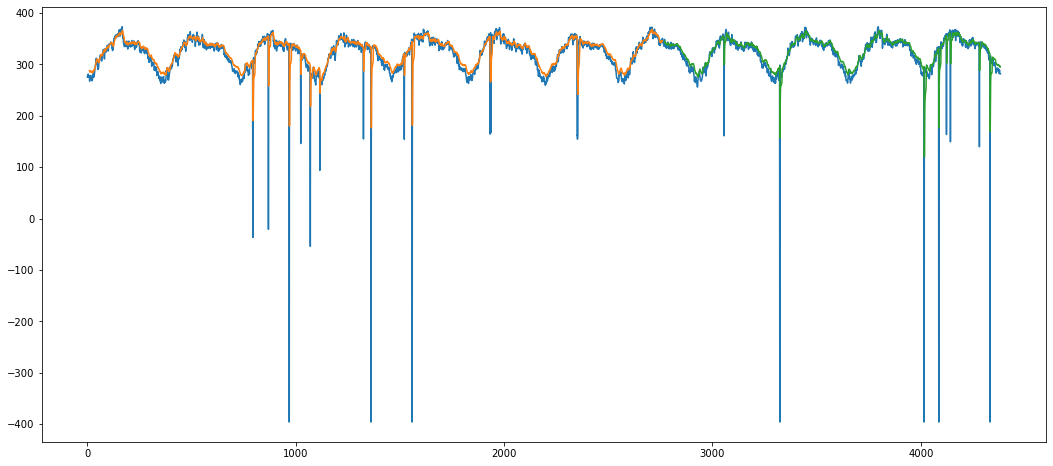

In [56]:
### Plotting 
# shift train predictions for plotting
look_back=10
trainPredictPlot = np.empty_like(Sales_y)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(Sales_y)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(Sales_y)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(Sales_y))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [57]:
#Save the model
model.save("sales_f.h5")


In [58]:
#prediction for next 10 days

In [59]:
len(Sales)

4383

In [60]:
Sales=np.array(Sales)

In [61]:
x_input=Sales[4372:4382].reshape(1,-1)
x_input.shape

(1, 10)

In [62]:
x_input

array([[291.2, 285.6, 285.3, 286.2, 282.3, 290. , 288.4, 283.3, 281.7,
        282. ]])

In [63]:
len(test_data)

1622

In [64]:

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [65]:
temp_input

[291.20000000000005,
 285.6,
 285.3,
 286.2,
 282.3,
 290.0,
 288.4,
 283.3,
 281.7,
 282.0]

In [66]:
len(temp_input)

10

### Predict the future 10 days 

In [73]:
# demonstrate prediction for next 10 days
from numpy import array
lst_output=[]
n_steps=10
i=0
while(i<10):
    
    if(len(temp_input)>=10):
        #print("temp_input",temp_input)
        x_input=np.array(temp_input[0:])
        print("{} day input {}".format(i,x_input))
        x_input=np.expand_dims(x_input, axis=1)
        x_input=scaler.transform(x_input)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        yhat=scaler.inverse_transform(yhat)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        print("Please give 10 number of inputs")

0 day input [294.18624878 296.9369812  299.08758545 300.84292603 302.35446167
 303.95614624 305.32019043 306.78991699 308.53903198 310.46029663]
0 day output [[312.46017]]
1 day input [296.9369812  299.08758545 300.84292603 302.35446167 303.95614624
 305.32019043 306.78991699 308.53903198 310.46029663 312.46017456]
1 day output [[314.0575]]
2 day input [299.08758545 300.84292603 302.35446167 303.95614624 305.32019043
 306.78991699 308.53903198 310.46029663 312.46017456 314.05749512]
2 day output [[315.52634]]
3 day input [300.84292603 302.35446167 303.95614624 305.32019043 306.78991699
 308.53903198 310.46029663 312.46017456 314.05749512 315.52633667]
3 day output [[316.9084]]
4 day input [302.35446167 303.95614624 305.32019043 306.78991699 308.53903198
 310.46029663 312.46017456 314.05749512 315.52633667 316.90838623]
4 day output [[318.23422]]
5 day input [303.95614624 305.32019043 306.78991699 308.53903198 310.46029663
 312.46017456 314.05749512 315.52633667 316.90838623 318.2342224

In [ ]:
day_new=np.arange(1,11)
day_pred=np.arange(11,21)

In [ ]:
len(Sales_y)